### **Problem: Multiclass Classification**

## **Objective: Prediction of Wine Classes**

# **Introduction**

Source: https://archive.ics.uci.edu/dataset/109/wine

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

Inputs: 

1)Alcohol 

2)Malic acid 

3)Ash 

4)Alcalinity of ash

5)Magnesium 

6)Total phenols 

7)Flavanoids 

8)Nonflavanoid phenols 

9)Proanthocyanins 

10)Color intensity 

11)Hue 

12)OD280/OD315 of diluted wines 

13)Proline

Outputs: Class 1, Class 2, Class 3

In [1]:
# Exploratory data analysis and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

# Feature Selection
import mlxtend
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Models from Scikit-Learn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from xgboost import XGBClassifier

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Model evaluations 
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, average_precision_score

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [2]:
# For fixing random_state parameters
seed = 20

# **1.Importing data**

In [2]:
columns = ["class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", 
           "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]

In [3]:
df = pd.read_table("wine.data", sep=",", names = columns)
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# **2.Exploratory data analysis**

#### **2.1.General information about dtypes and null values**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

#### **2.2.Number of observations and features**

In [5]:
df.shape

(178, 14)

#### **2.3.Missing values**

In [6]:
df.isna().sum()

class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

There are no missing values.

#### **2.4.How many of each class?**

In [7]:
classes = df["class"].value_counts()
classes_df = pd.DataFrame(classes)
classes_df = classes.reset_index(level = 0)
classes_df

,class,count
0,2,71
1,1,59
2,3,48


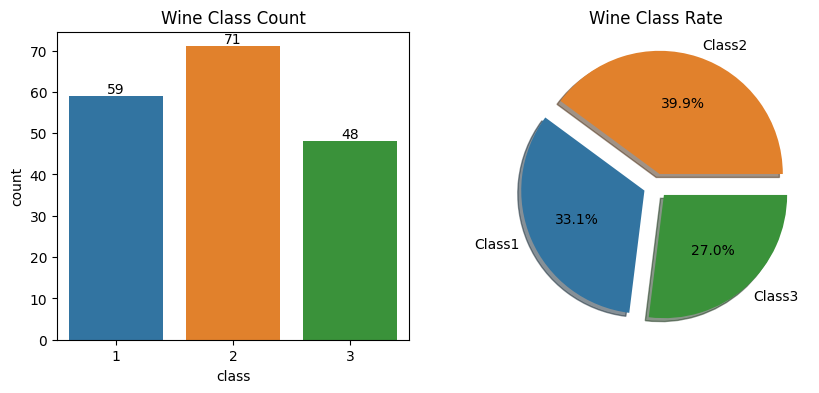

In [8]:
# Plotting wine class counts and rates
cmap = ["#e1812c","#3274a1","#3a923a","#c03d3e","#857aab","#8d7866"]
wine_cmap = ["#9f7a96","#e0c1c8","#d3b2c6","#f5e7e4"]

plt.subplots(1, 2, figsize = (10, 4))
plt.subplot(121)
ax = sns.barplot(data = classes_df, 
                 x = classes_df["class"], 
                 y = classes_df["count"])
ax.bar_label(ax.containers[0])
plt.title("Wine Class Count");

plt.subplot(122) 
plt.pie(x = classes, 
        explode = [0.1, 0.1, 0.1],
        labels = ["Class2", "Class1", "Class3"],
        colors = cmap,
        autopct = "%.1f%%", 
        shadow = True)
plt.title("Wine Class Rate");

#### **2.5.General description of data (count, mean, std, min, max and quartiles)**

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


Min and max values, their means and relation with standart deviation seems normal.

#### **2.6.Classes by features**

<Figure size 2000x1600 with 0 Axes>

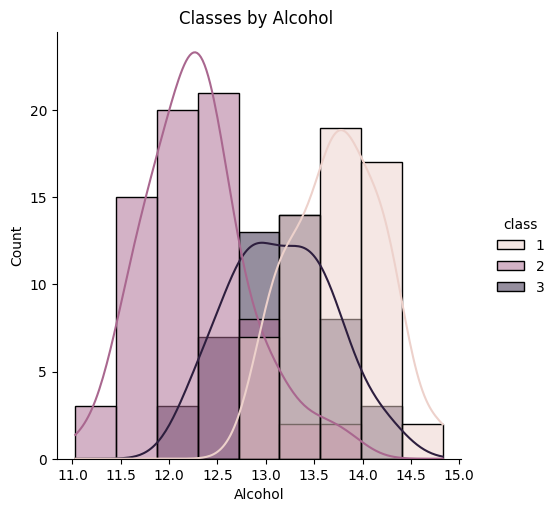

<Figure size 2000x1600 with 0 Axes>

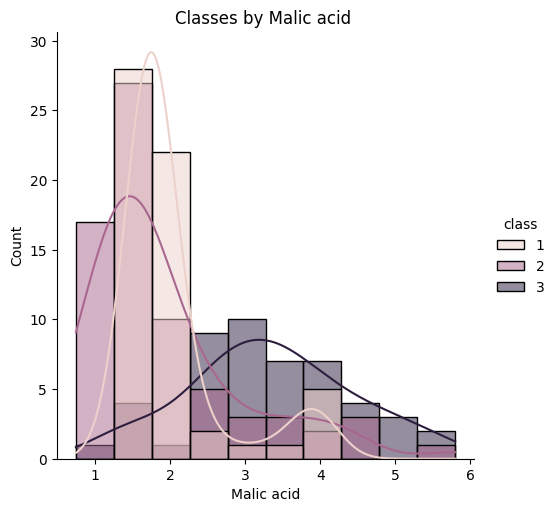

<Figure size 2000x1600 with 0 Axes>

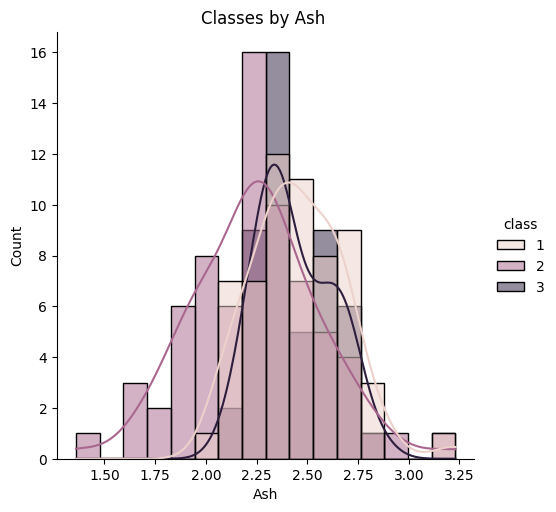

<Figure size 2000x1600 with 0 Axes>

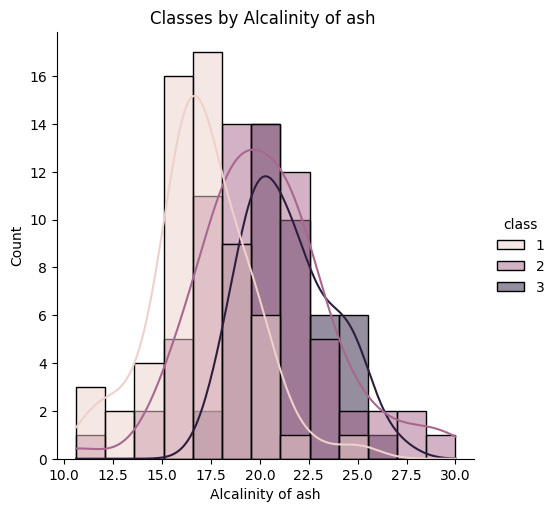

<Figure size 2000x1600 with 0 Axes>

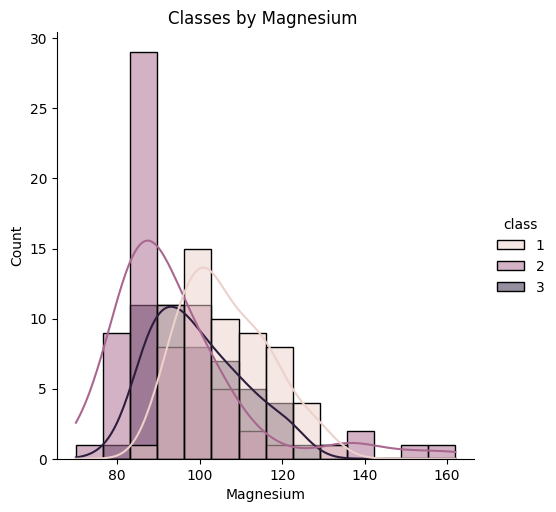

<Figure size 2000x1600 with 0 Axes>

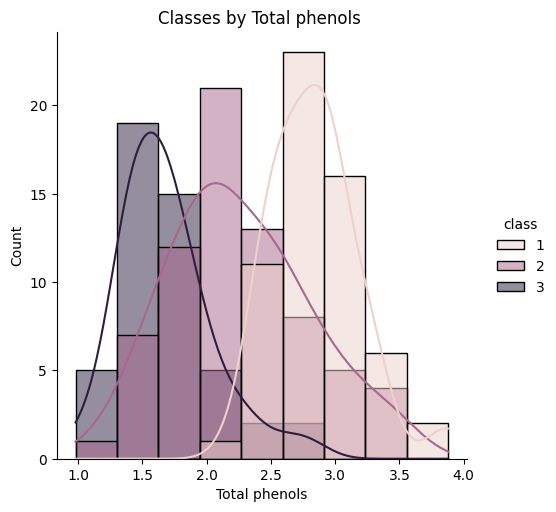

<Figure size 2000x1600 with 0 Axes>

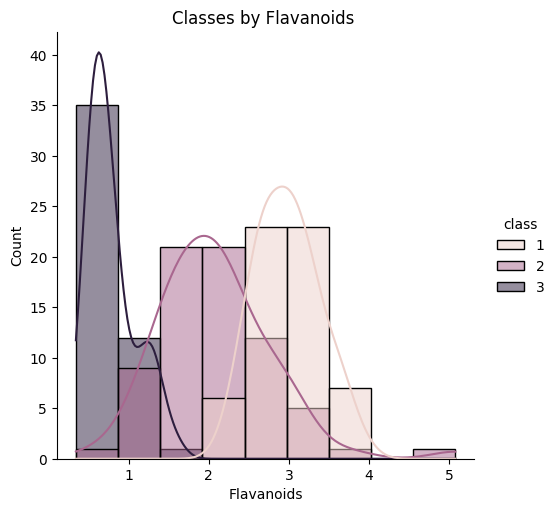

<Figure size 2000x1600 with 0 Axes>

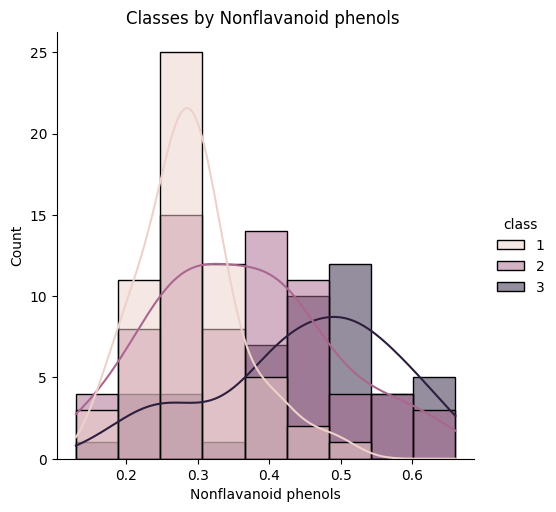

<Figure size 2000x1600 with 0 Axes>

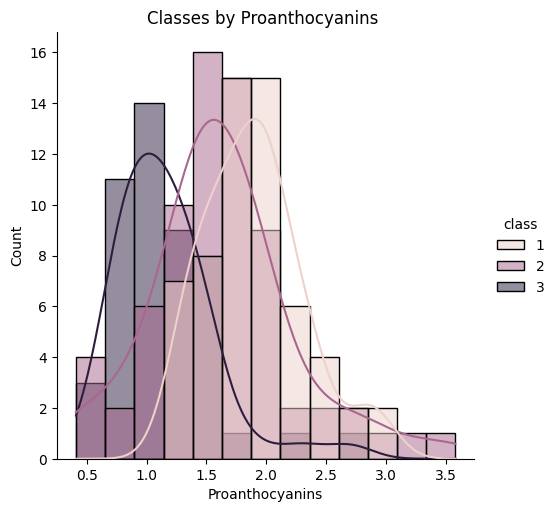

<Figure size 2000x1600 with 0 Axes>

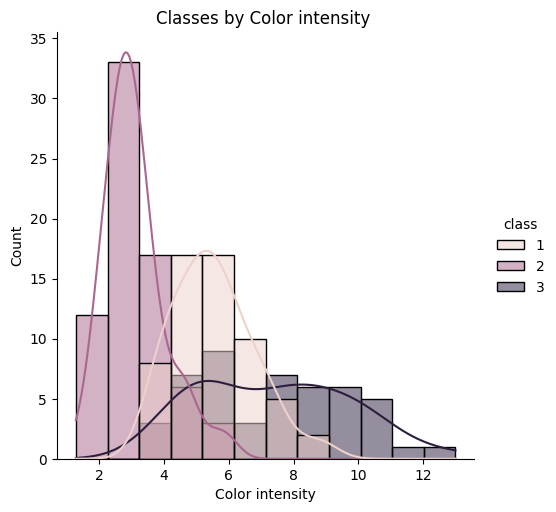

<Figure size 2000x1600 with 0 Axes>

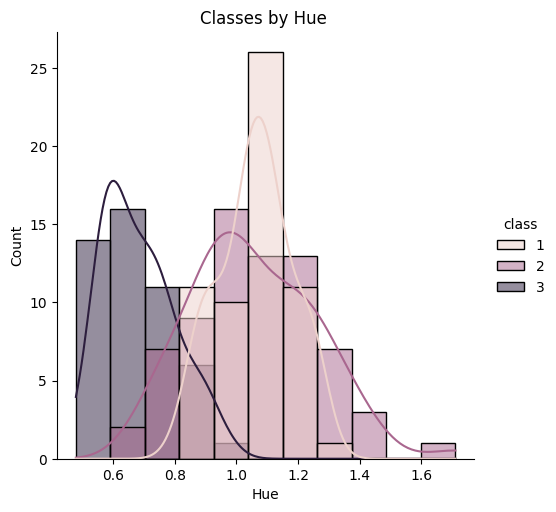

<Figure size 2000x1600 with 0 Axes>

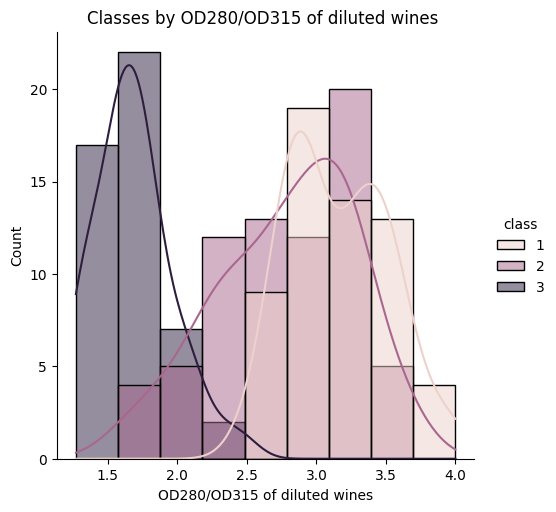

In [10]:
columns = df.columns[:len(df.columns) - 1]
for column in columns[1:]:
    plt.figure(figsize = (10,8), dpi = 200)
    sns.displot(data = df, 
                x = str(column),
                kde = True, 
                hue = "class").set(title = "Classes by {} ".format(str(column)))
    plt.show();

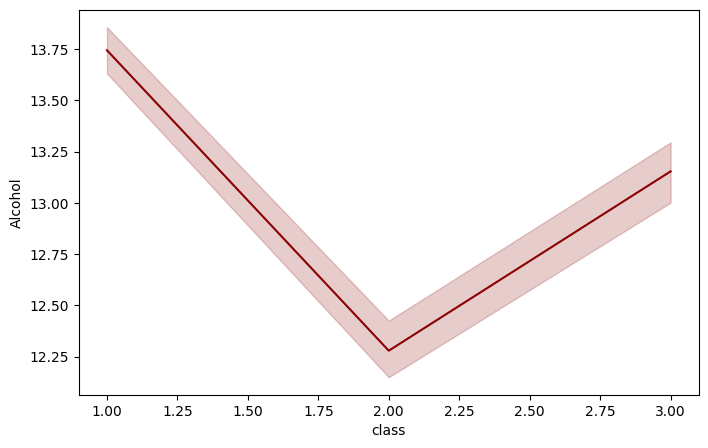

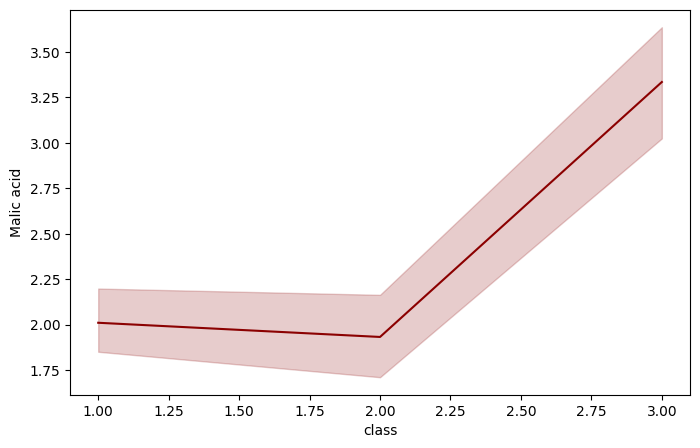

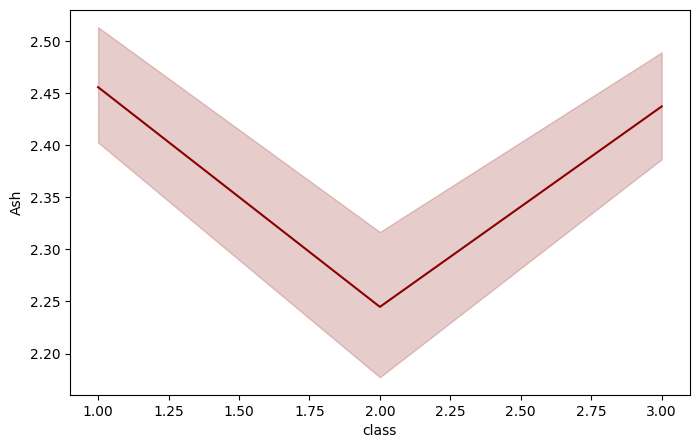

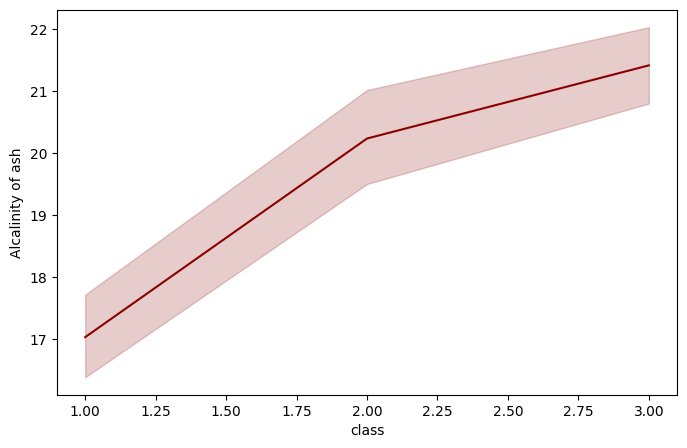

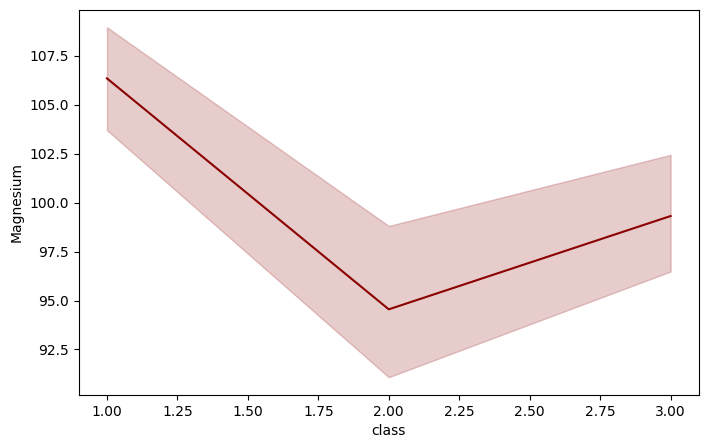

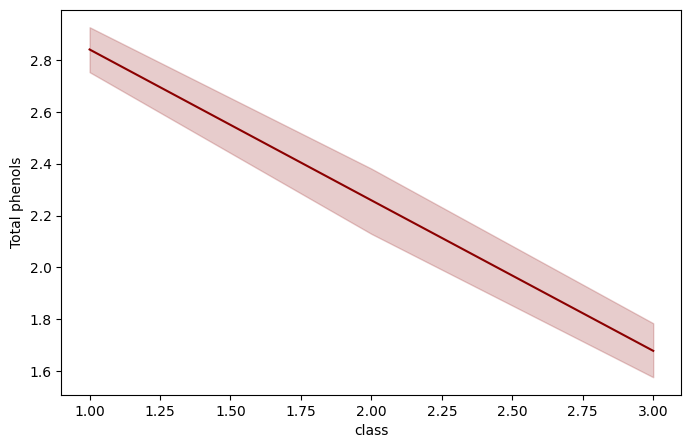

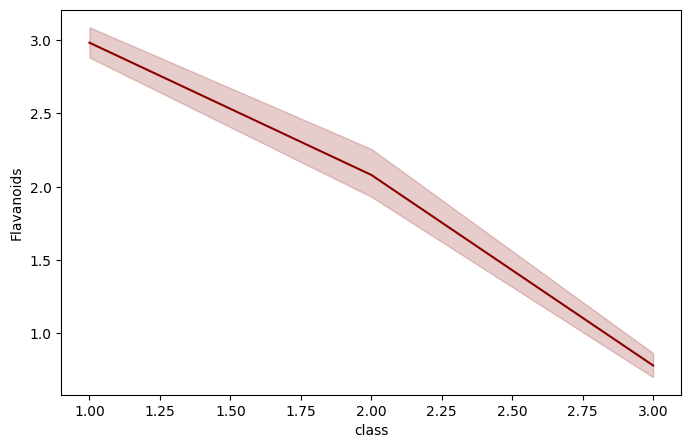

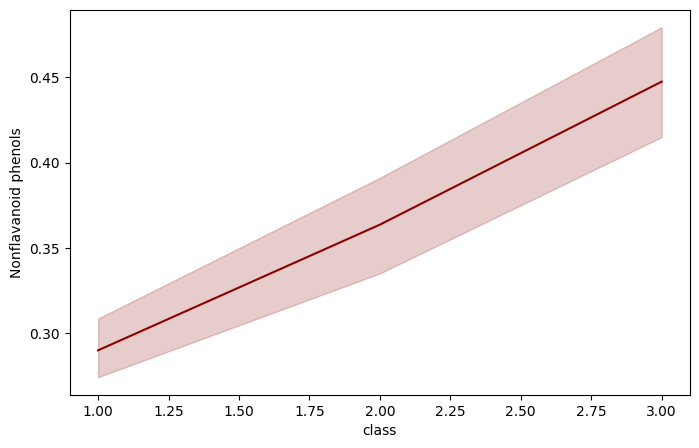

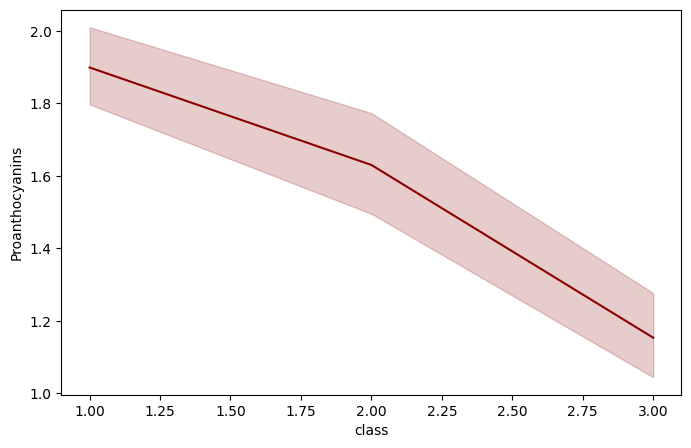

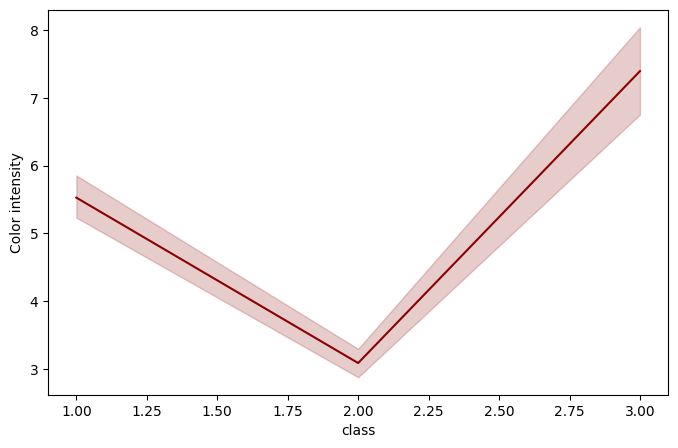

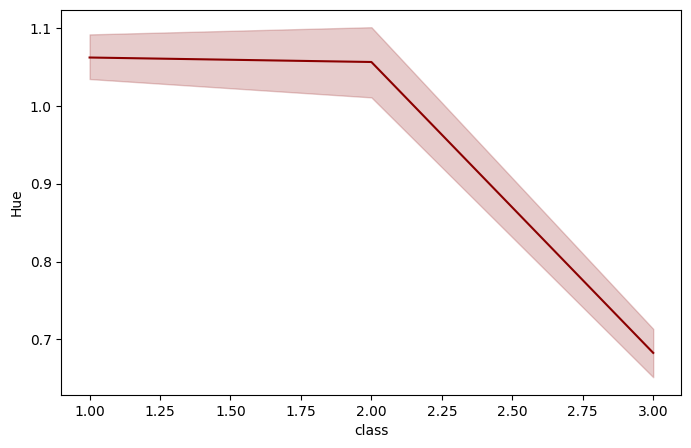

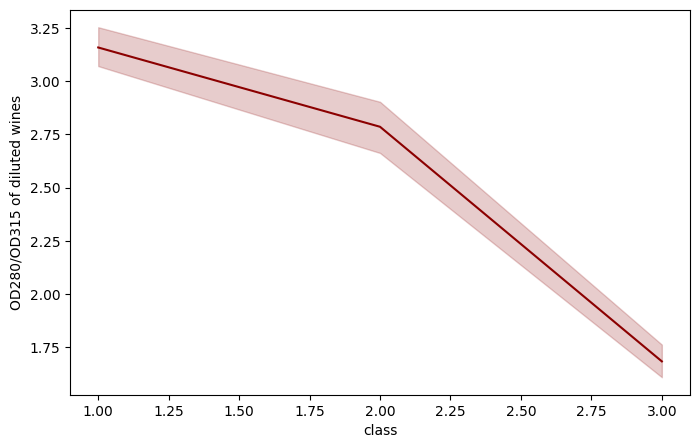

In [11]:
# Another view for features effect on class determination
for i in range(len(columns[1:])):
    plt.figure(figsize = (8, 5))
    sns.lineplot(data = df, x = "class", y = columns[i + 1], color = "darkred")

In general, it can be said that Class 1 wines have higher alcohol rate, while Class 2 wines have the lowest. Class 3 wines have an average alcohol rate. Alcohol rates seem to be have a characteristic effect on wine classes.

Class 2 wines have lowest malic acid rates, while Class 1 wines have higher malic acid rates than Class 2 and Class 3 higher malic acid rates than Class 1.

Ash rates seem close for all wine classes. So, we can say that ash rates are not so deterministic for wine class here. On the other hand Class 1 wines have lower alcalinity of ash than Class 2 and Class 3 wines. Alcalinity of ash rates also seem to be have a characteristic effect on wine classes.

Class 2 wines have lower magnesium rate than Class 3 wines. Class 1 wines have the highest magnesium rates.

Class 3 wines have lowest total phenols rate. Than comes Class 2 and than Class 1. It decreases linearly. Similarly, Class 3 wines have lowest flavanoids rate. Than comes Class 2 and than Class 1. Nonflavanoids phenols are its opposite. Again, Class 3 wines have lowest proanthocyanins rate. Than comes Class 2 and than Class 1. This block also appears to have a characteristic effect on wine classes.

Class 2 wines have lower color intensity, while Class 1 wines have higher color intensity.


#### **2.7.Distribution of features**

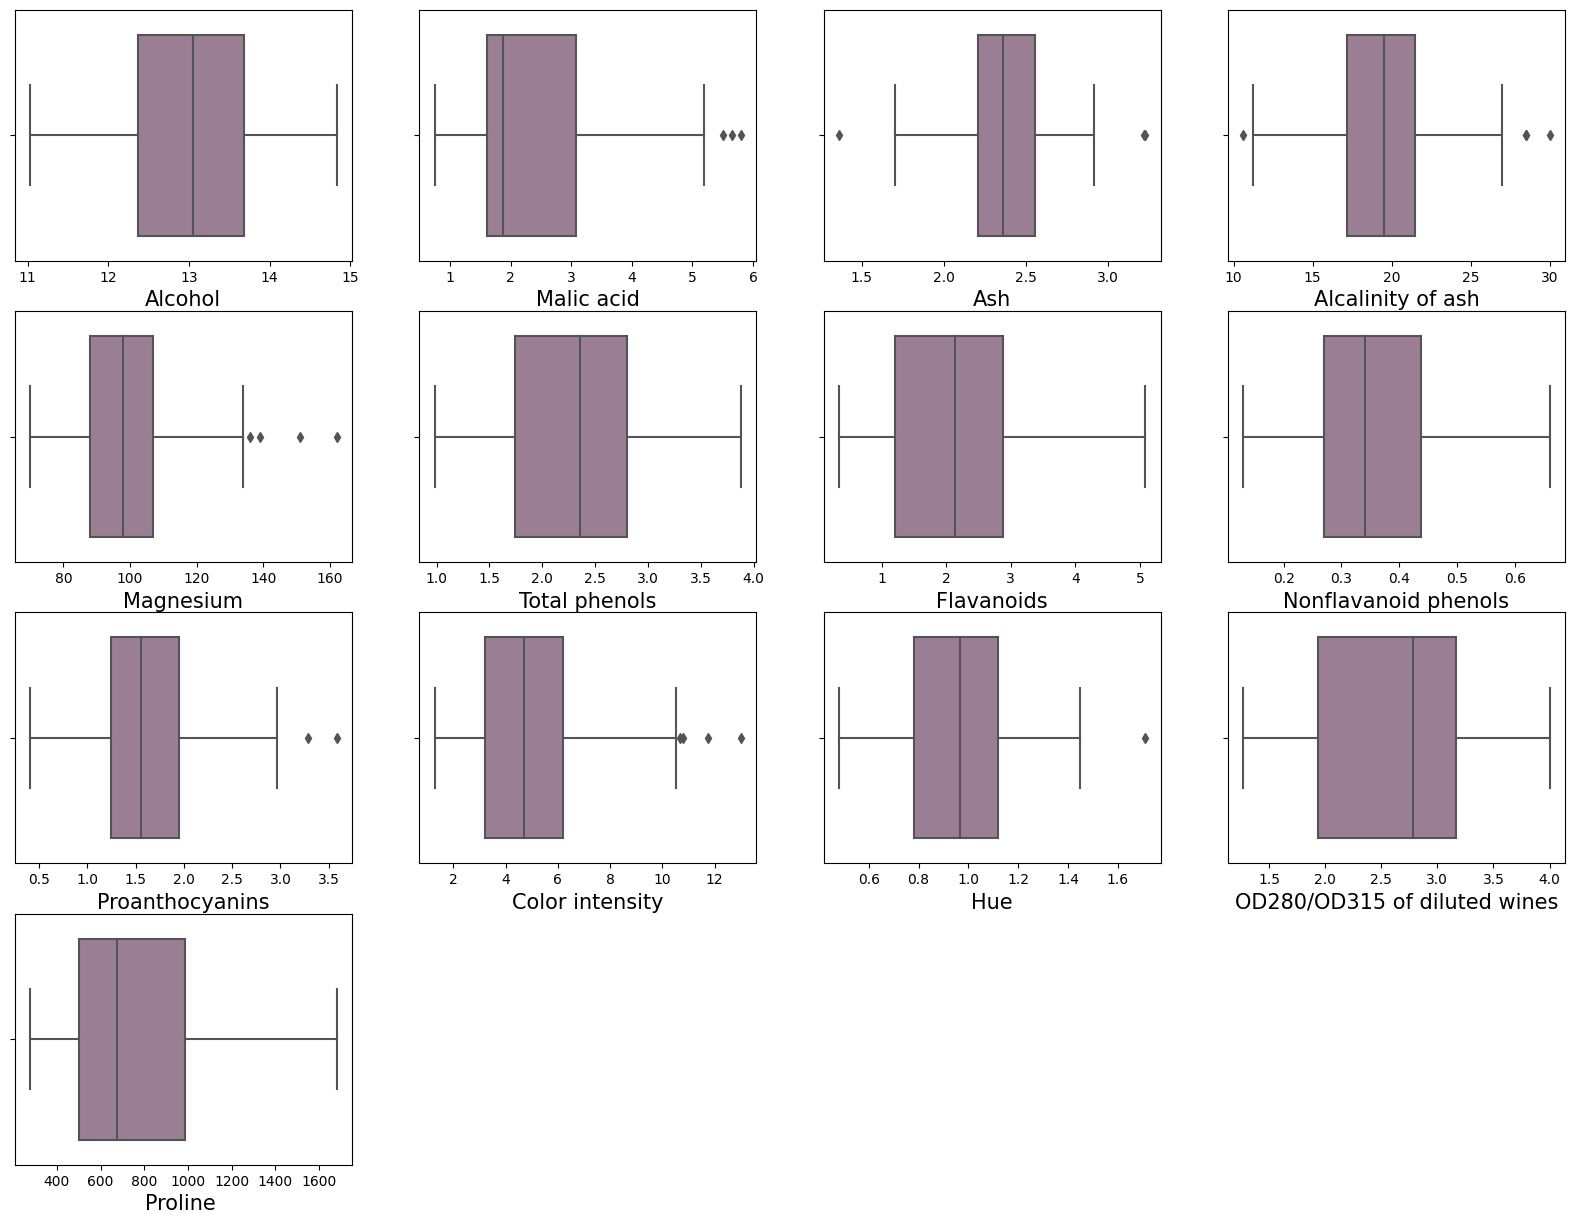

In [12]:
plt.figure(figsize = (20, 15))
for i, col in enumerate(df.iloc[:, 1:14]):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data = df.iloc[:, 1:14], x = col , color = "#9f7a96")
    plt.xlabel(col, fontsize = 15)
    plt.xticks(fontsize = 10)

There appear to be outliers in some features.

#### **2.8.Correlations**

In [13]:
df.corr()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
class,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity of ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


(14.5, -0.5)

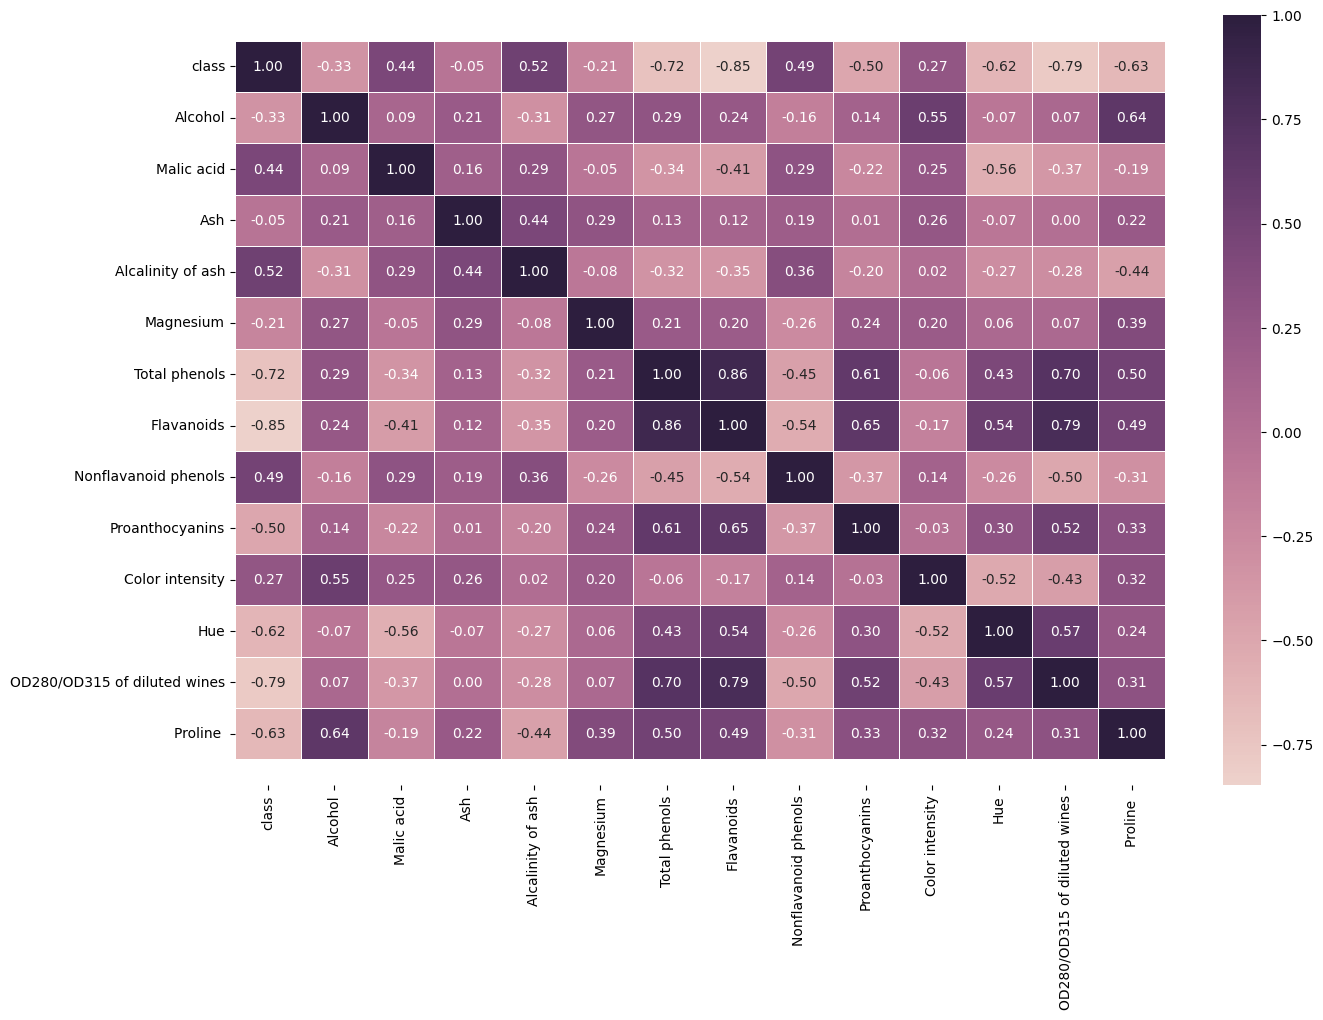

In [14]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 linewidths = 0.5,
                 fmt = ".2f",
                 cmap = sns.cubehelix_palette(as_cmap=True));
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# **3.Data preprocessing**

#### **3.1.Outliers**

In [15]:
# Creating fence list
def fenceList(df):
    feature_list = []
    q1_list = []
    q3_list = []
    iqr_list = []
    low_list = []
    up_list = []
    for col in df.iloc[:, 1:14].columns:
        feature_list.append(col)
        q1 = df[col].quantile(0.25)
        q1_list.append(q1)
        q3 = df[col].quantile(0.75)
        q3_list.append(q3)
        iqr = q3 - q1
        iqr_list.append(iqr)

        lower_fence = q1 - (1.5 * iqr)
        low_list.append(lower_fence)
        upper_fence = q3 + (1.5 * iqr)
        up_list.append(upper_fence)
        
        list_of_lists = [q1_list, q3_list, iqr_list, low_list, up_list]
        fence_list = pd.DataFrame(list_of_lists, index = ["q1", "q2", "iqr", "lowerFence", "upperFence"],
                columns = feature_list)       
    return fence_list

In [16]:
fenceList(df)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
q1,12.3625,1.6025,2.21000,17.20,88.0,1.74250,1.205,0.27000,1.25,3.22,0.78250,1.93750,500.50
q2,13.6775,3.0825,2.55750,21.50,107.0,2.80000,2.875,0.43750,1.95,6.20,1.12000,3.17000,985.00
iqr,1.3150,1.4800,0.34750,4.30,19.0,1.05750,1.670,0.16750,0.70,2.98,0.33750,1.23250,484.50
lowerFence,10.3900,-0.6175,1.68875,10.75,59.5,0.15625,-1.300,0.01875,0.20,-1.25,0.27625,0.08875,-226.25
upperFence,15.6500,5.3025,3.07875,27.95,135.5,4.38625,5.380,0.68875,3.00,10.67,1.62625,5.01875,1711.75


In [17]:
# How many outliers of each feature?
def detectOutliers(df):
    outliers = pd.DataFrame(columns = ["Feature", "Number of Outliers"])
    features = []
    numbers = []
    for col in df.columns:
        features.append(col)
        #Return values at the given quantile
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)
        num_of_out = df.loc[(df[col] < lower_fence) | (df[col] > upper_fence)].shape[0]
        numbers.append(num_of_out)

        lower_fence = df.loc[(df[col] < lower_fence), col]
        upper_fence = df.loc[(df[col] > upper_fence), col] 

    outliers["Feature"] = features
    outliers["Number of Outliers"] = numbers
    
    print("Total number of outliers:", outliers["Number of Outliers"].sum())
    print("Percentage of outliers: % {:.3f}".format(outliers["Number of Outliers"].sum()/df.shape[0]))
    return outliers  

In [18]:
detectOutliers(df.iloc[:, 1:14])

Total number of outliers: 21
Percentage of outliers: % 0.118


,Feature,Number of Outliers
0,Alcohol,0
1,Malic acid,3
2,Ash,3
3,Alcalinity of ash,4
4,Magnesium,4
5,Total phenols,0
6,Flavanoids,0
7,Nonflavanoid phenols,0
8,Proanthocyanins,2
9,Color intensity,4


In [19]:
# Remove outliers
def removeOutliers(df):
    for col in df.iloc[:, 1:14].columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower_fence = q1 - (1.5 * iqr)
        upper_fence = q3 + (1.5 * iqr)

        df = df[(df[col] > lower_fence) & (df[col] < upper_fence)]
    return df

In [20]:
df = removeOutliers(df)
df

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Now there are 167 observations without outliers.

#### **3.2.Splitting**

In [21]:
# Split data into features and target
X = df.drop(["class"], axis=1)
y = df["class"]

In [22]:
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
172    3
174    3
175    3
176    3
177    3
Name: class, Length: 161, dtype: int64

In [24]:
# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = seed)

#### **3.3.Standardization**

In [25]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_trainStandart = scaler.transform(X_train)
X_testStandart = scaler.transform(X_test)

In [26]:
X_trainStandart, len(X_trainStandart)

(array([[ 1.67842156, -0.44645928,  0.41251442, ...,  0.33843011,
          1.33919829,  1.69695751],
        [ 1.05967659, -0.42779911,  1.02445634, ..., -0.31977127,
          1.31123005,  1.07262362],
        [ 1.47217323, -0.60507078, -0.24313764, ..., -0.03768497,
          0.96162697,  0.67240959],
        ...,
        [ 0.47732838,  1.45687864,  0.54364483, ..., -1.16603019,
         -1.48559458, -0.0319671 ],
        [ 0.42879936,  0.19731678, -0.02458695, ..., -1.16603019,
         -0.21303938,  0.06408427],
        [ 0.59865092,  0.7198017 ,  1.15558675, ..., -1.68318842,
         -1.84918179, -0.83239515]]),
 128)

In [27]:
X_testStandart, len(X_testStandart)

(array([[-1.01493890e+00, -8.38322974e-01,  7.62195515e-01,
         -9.43977549e-02,  4.08328719e-01, -6.78511085e-01,
         -2.93977945e-01,  7.55578863e-01, -1.02559084e+00,
         -9.44874201e-01,  2.36004863e+00, -5.48658332e-01,
         -1.29664342e+00],
        [ 8.77692772e-01, -7.91672535e-01,  1.50526785e+00,
          1.06107203e+00,  1.62177655e-01,  1.10738841e+00,
          1.21763870e+00, -5.64750072e-01,  1.55669237e+00,
          2.93566818e-01,  1.13767464e+00,  1.22579580e-01,
          1.68094895e+00],
        [-9.28875720e-02,  4.30568977e-01,  1.50526785e+00,
          5.65870695e-01, -2.48074120e-01, -1.24163255e+00,
         -1.55365848e+00,  1.41574333e+00, -1.56117550e+00,
         -2.01809590e-01, -8.36929501e-01, -4.36785347e-01,
         -5.12223929e-01],
        [ 2.84349710e-02, -1.35147781e+00, -2.82203573e+00,
         -1.08480043e+00, -1.06857767e+00, -5.81975977e-01,
         -1.18095050e-02, -9.77352864e-01, -2.03085815e-01,
         -2.0180959

# **4.Modelling**

In [28]:
# Classifier comparison with default parameters
scoresCV = []
classifiers = [KNeighborsClassifier(),
               LogisticRegression(random_state = seed),
               RandomForestClassifier(random_state = seed), 
               GradientBoostingClassifier(random_state = seed),
               DecisionTreeClassifier(random_state = seed),
               SVC(random_state = seed)
              ]

for classifier in classifiers:
    pipe = make_pipeline(preprocessing.StandardScaler(), classifier)
    scoreCV = cross_val_score(pipe, 
                              X_train, 
                              y_train, 
                              scoring = "accuracy", 
                              cv = StratifiedKFold(n_splits = 10, 
                                                   shuffle = True,
                                                   random_state = seed))
    scoresCV.append([classifier, np.mean(scoreCV)]) 

In [29]:
# Best classifiers according to validation accuracy descending
c_val = pd.DataFrame(scoresCV, columns=["Classifier", "Validation Accuracy"])
c_val_sort = c_val.sort_values(by = "Validation Accuracy", ignore_index = True)
c_val_sort

,Classifier,Validation Accuracy
0,DecisionTreeClassifier(random_state=20),0.844231
1,GradientBoostingClassifier(random_state=20),0.946154
2,LogisticRegression(random_state=20),0.976923
3,KNeighborsClassifier(),0.983974
4,RandomForestClassifier(random_state=20),0.984615
5,SVC(random_state=20),0.984615


#### **4.1.Decision Tree Model**

##### **4.1.1.Parameter Tuning**

In [30]:
# Creating model
clf = DecisionTreeClassifier(random_state = seed)
# For ccp_alpha values
path = clf.cost_complexity_pruning_path(X_train, y_train)
alphas = path["ccp_alphas"]
# Searching parameters
params = {"ccp_alpha": alphas,
          "max_features": np.arange(1,10),
          "max_depth": [3]}          
# Creating grid
dt_clf_grid = RandomizedSearchCV(estimator = clf, 
                                 param_distributions = params,
                                 cv = StratifiedKFold(n_splits = 10, 
                                                      shuffle = True,
                                                      random_state = seed),
                                 verbose = 2, 
                                 scoring = "accuracy",
                                 n_jobs = -1)
# Fit the model
dt_model = dt_clf_grid.fit(X_train, y_train)

# Get best parameters
print("Best parameters for Decision Tree model:", dt_model.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters for Decision Tree model: {'max_features': 7, 'max_depth': 3, 'ccp_alpha': 0.015066964285714284}


In [31]:
# Best parameters
dt_best = pd.DataFrame.from_dict(dt_model.best_params_, orient = "index").rename(columns = {0: "Best"})
dt_best

,Best
max_features,7.000000
max_depth,3.000000
ccp_alpha,0.015067


##### **4.1.2.Building model with best parameters**

In [32]:
dt_clf = DecisionTreeClassifier(max_features = int(dt_best.iloc[0,0]),
                                max_depth = int(dt_best.iloc[1,0]),
                                ccp_alpha = dt_best.iloc[2,0],
                                random_state = seed)
# Fit the model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.015066964285714284, max_depth=3,
                       max_features=7, random_state=20)

##### **4.1.3.Predictions and model accuracy**

In [33]:
dt_pred = dt_clf.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Model Accuracy:", dt_acc)
dt_acc_tr = dt_clf.score(X_train, y_train)
print("Decision Tree Training Accuracy:", dt_acc_tr)

Decision Tree Model Accuracy: 0.9393939393939394
Decision Tree Training Accuracy: 0.9921875


##### **4.1.4.Other test parameters**

In [34]:
# Classification Report
print("Decision Tree Classification Report\n\n", classification_report(y_test, dt_pred))

Decision Tree Classification Report

               precision    recall  f1-score   support

           1       0.92      1.00      0.96        12
           2       0.92      0.92      0.92        12
           3       1.00      0.89      0.94         9

    accuracy                           0.94        33
   macro avg       0.95      0.94      0.94        33
weighted avg       0.94      0.94      0.94        33



In [35]:
# For comparison list records
dt_recall = recall_score(y_test, dt_pred, average = None)
dt_prec = precision_score(y_test, dt_pred, average = None)
dt_f1 = f1_score(y_test, dt_pred, average = None)

Decision Tree Confusion Matrix


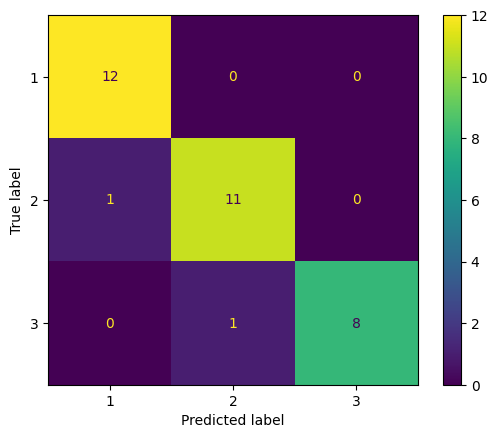

In [36]:
# Confusion matrix
dt_cm = confusion_matrix(y_test, dt_pred, labels = dt_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = dt_cm,
                              display_labels = dt_clf.classes_)
print("Decision Tree Confusion Matrix")
disp.plot()
plt.show()

In [37]:
# Prediction rates by wine classes
def calculatePredictionRates(model_name, acc, cm):
    print(f"""
    The success rate of the {model_name} model on the test set: {(acc*100):.0f}%
    Class 1 Wine correct prediction rate: {((cm[0][0]/sum(cm[0]))*100):.0f}%"
    Class 2 Wine correct prediction rate: {((cm[1][1]/sum(cm[1]))*100):.0f}%"
    Class 3 Wine correct prediction rate: {((cm[2][2]/sum(cm[2]))*100):.0f}%
    """)

In [38]:
calculatePredictionRates("Decision Tree", dt_acc, dt_cm)


    The success rate of the Decision Tree model on the test set: 94%
    Class 1 Wine correct prediction rate: 100%"
    Class 2 Wine correct prediction rate: 92%"
    Class 3 Wine correct prediction rate: 89%
    


In [39]:
# Train/Test Performance Metrics
def CalculatePerformance(classifier, X_train, y_train, X_test, y_test):
    train_pred = classifier.predict(X_train)
    test_pred = classifier.predict(X_test)
    scores = {
        "Train Accuracy": accuracy_score(y_train, train_pred), 
        "Test Accuracy": accuracy_score(y_test, test_pred),
        "Train Recall": recall_score(y_train, train_pred, average = None),
        "Test Recall": recall_score(y_test, test_pred, average = None),
        "Train Precision": precision_score(y_train, train_pred, average = None), 
        "Test Precision": precision_score(y_test, test_pred, average = None), 
        "Train F1": f1_score(y_train, train_pred, average = None),
        "Test F1": f1_score(y_test, test_pred, average = None) 
    }
    print("Model Performance Metrics Comparison")
    return scores

In [40]:
dt_pm = pd.DataFrame(CalculatePerformance(dt_clf, X_train, y_train, X_test, y_test))*100
dt_pm

Model Performance Metrics Comparison


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,99.21875,93.939394,97.777778,100.000000,100.0,92.307692,98.876404,96.000000
1,99.21875,93.939394,100.000000,91.666667,98.0,91.666667,98.989899,91.666667
2,99.21875,93.939394,100.000000,88.888889,100.0,100.000000,100.000000,94.117647


In [41]:
# Creating comparison lists
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
model_names = []
clf_list = []
pred_list = []
acc_list = []
cm_list = []
f1_list = []
performs = []
prec_list = []
recall_list = []
tr_acc_list = []
# Updating comparison lists
def updateLists(model_name, clf, pred, acc, cm, f1, pm, prec, recall, acc_tr):
    model_names.append(model_name) 
    clf_list.append(clf)
    pred_list.append(pred)
    acc_list.append(acc)
    cm_list.append(cm)
    f1_list.append(f1)
    performs.append(pm)
    prec_list.append(prec)
    recall_list.append(recall)
    tr_acc_list.append(acc_tr)

In [42]:
updateLists("DecisionTree", dt_clf, dt_pred, dt_acc, dt_cm, dt_f1, dt_pm, dt_prec, dt_recall, dt_acc_tr)

##### **4.1.5.Feature Importances**

In [43]:
# Ploting the impurity-based feature importances
feats = {} # a dictionary to hold feature_name: feature_importance
importances = dt_clf.feature_importances_
dt_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.42544711, 0.        , 0.02356804, 0.39825656,
       0.        , 0.        , 0.15272828])

<Axes: >

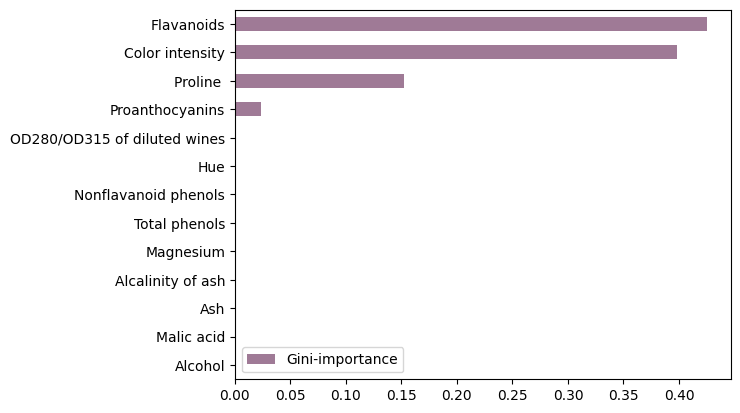

In [44]:
for feature, importance in zip(X.columns, dt_clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient = "index").rename(columns = {0: "Gini-importance"})
importances = importances.sort_values(by = "Gini-importance")
importances.plot.barh(color = "#9f7a96")

#### **4.2.Gradient Boosting Model**

##### **4.2.1.Parameter Tuning**

In [45]:
# Creating model
clf = GradientBoostingClassifier(random_state = seed)
# Searching parameters
params = {"n_estimators": [50, 100, 500, 1000], 
          "learning_rate": [1, 0.1, 0.01, 0.001]}
# Creating grid
gb_clf_grid = RandomizedSearchCV(estimator = clf, 
                                 param_distributions = params,
                                 cv = StratifiedKFold(n_splits = 5, 
                                                      shuffle = True,
                                                      random_state = seed),
                                 n_iter = 10,
                                 verbose = 2, 
                                 scoring = "accuracy",
                                 n_jobs = -1)
# Fit the model
gb_model = gb_clf_grid.fit(X_train, y_train)

# Get best parameters
print("Best parameters for Gradient Boosting model: ", gb_model.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Gradient Boosting model:  {'n_estimators': 500, 'learning_rate': 0.001}


In [46]:
# Best parameters
gb_best = pd.DataFrame.from_dict(gb_model.best_params_, orient = "index").rename(columns = {0: "Best"})
gb_best

,Best
n_estimators,500.000
learning_rate,0.001


##### **4.2.2.Building model with best parameters**

In [47]:
gb_clf = GradientBoostingClassifier(n_estimators = int(gb_best.iloc[0,0]),
                                    learning_rate = gb_best.iloc[1,0],
                                    random_state = seed)
# Fit the model
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=500,
                           random_state=20)

##### **4.2.3.Predictions and model accuracy**

In [48]:
gb_pred = gb_clf.predict(X_test)
gb_acc = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Model Accuracy:", gb_acc)
gb_acc_tr = gb_clf.score(X_train, y_train)
print("Gradient Boosting Training Accuracy:", gb_acc_tr)

Gradient Boosting Model Accuracy: 1.0
Gradient Boosting Training Accuracy: 1.0


##### **4.2.4.Other test parameters**

In [49]:
# Classification Report
print("Gradient Boosting Classification Report\n\n", classification_report(y_test, gb_pred))

Gradient Boosting Classification Report

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12
           3       1.00      1.00      1.00         9

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [50]:
# For comparison list records
gb_recall = recall_score(y_test, gb_pred, average = None)
gb_prec = precision_score(y_test, gb_pred, average = None)
gb_f1 = f1_score(y_test, gb_pred, average = None)

Gradient Boosting Confusion Matrix


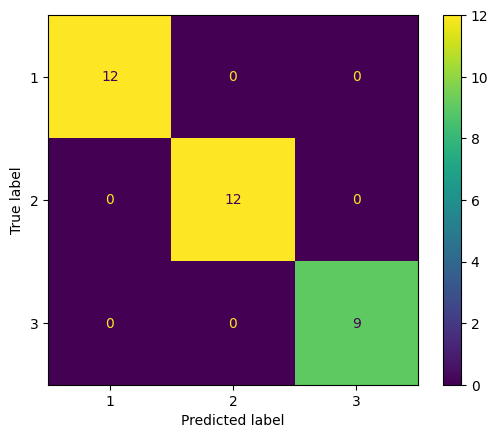

In [51]:
# Confusion matrix
gb_cm = confusion_matrix(y_test, gb_pred, labels = gb_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = gb_cm,
                              display_labels = gb_clf.classes_)
print("Gradient Boosting Confusion Matrix")
disp.plot()
plt.show()

In [52]:
# Prediction rates by wine classes
calculatePredictionRates("Gradient Boosting", gb_acc, gb_cm)


    The success rate of the Gradient Boosting model on the test set: 100%
    Class 1 Wine correct prediction rate: 100%"
    Class 2 Wine correct prediction rate: 100%"
    Class 3 Wine correct prediction rate: 100%
    


In [53]:
# Train/Test Performance Metrics
gb_pm = pd.DataFrame(CalculatePerformance(gb_clf, X_train, y_train, X_test, y_test))*100
gb_pm

Model Performance Metrics Comparison


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [54]:
# Updating comparison lists
updateLists("GradientBoosting", gb_clf, gb_pred, gb_acc, gb_cm, gb_f1, gb_pm, gb_prec, gb_recall, gb_acc_tr)

##### **4.2.5.Feature Importances**

In [55]:
# Ploting the impurity-based feature importances
feats = {} # a dictionary to hold feature_name: feature_importance
importances = gb_clf.feature_importances_
gb_clf.feature_importances_

array([0.0005258 , 0.0326652 , 0.00614979, 0.00512977, 0.00298602,
       0.00099423, 0.31554297, 0.0004872 , 0.0005323 , 0.26391416,
       0.00055009, 0.07757857, 0.2929439 ])

<Axes: >

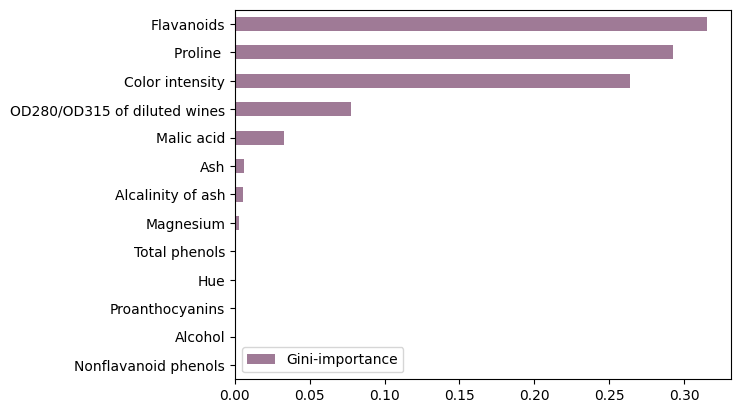

In [56]:
for feature, importance in zip(X.columns, gb_clf.feature_importances_):
    feats[feature] = importance #add the name/value pair 
importances = pd.DataFrame.from_dict(feats, orient = "index").rename(columns = {0: "Gini-importance"})
importances = importances.sort_values(by = "Gini-importance")
importances.plot.barh(color = "#9f7a96")

#### **4.3.Logistic Regression Model**

##### **4.3.1.Parameter Tuning**

In [57]:
# Creating pipeline
pipe = Pipeline([("scaler", preprocessing.StandardScaler()),
                 ("Classifier", LogisticRegression(max_iter = 1000, random_state = seed))])
# Searching parameters
params = [{"Classifier__solver": ["liblinear"], 
           "Classifier__penalty": ["l1", "l2"],
           "Classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}]
# Creating grid
lr_clf_grid = GridSearchCV(estimator = pipe,
                           param_grid = params,
                           cv = StratifiedKFold(n_splits = 10, 
                                                shuffle = True,
                                                random_state = seed),
                           refit = True,
                           verbose = 2,
                           scoring = "accuracy")
# Fit the model
lr_model = lr_clf_grid.fit(X_trainStandart, y_train)

# Get best parameters
print("Best parameters for Logistic Regression model: ", lr_model.best_params_)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__penalty=l1, Classifier__solver=liblinear; total time=   0.0s
[CV] END C

In [58]:
# Best parameters
lr_best = pd.DataFrame.from_dict(lr_model.best_params_, orient = "index").rename(columns = {0: "Best"})
lr_best

,Best
Classifier__C,1
Classifier__penalty,l2
Classifier__solver,liblinear


##### **4.3.2.Building model with best parameters**

In [59]:
lr_clf = LogisticRegression(C = float(lr_best.iloc[0,0]),
                            penalty = lr_best.iloc[1,0],
                            solver = lr_best.iloc[2,0],
                            max_iter = 1000, 
                            random_state = seed)
# Fitting the model
lr_clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=20, solver='liblinear')

##### **4.3.3.Predictions and model accuracy**

In [60]:
lr_pred = lr_clf.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Model Accuracy:", lr_acc)
lr_acc_tr = lr_clf.score(X_train, y_train)
print("Logistic Regression Training Accuracy:", lr_acc_tr)

Logistic Regression Model Accuracy: 0.9696969696969697
Logistic Regression Training Accuracy: 0.96875


##### **4.3.4.Other test parameters**

In [61]:
# Classification Report
print("Logistic Regression Classification Report\n\n", classification_report(y_test, lr_pred))

Logistic Regression Classification Report

               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.92      1.00      0.96        12
           3       1.00      0.89      0.94         9

    accuracy                           0.97        33
   macro avg       0.97      0.96      0.97        33
weighted avg       0.97      0.97      0.97        33



In [62]:
# For comparison list records
lr_recall = recall_score(y_test, lr_pred, average = None)
lr_prec = precision_score(y_test, lr_pred, average = None)
lr_f1 = f1_score(y_test, lr_pred, average = None)

Logistic Regression Confusion Matrix


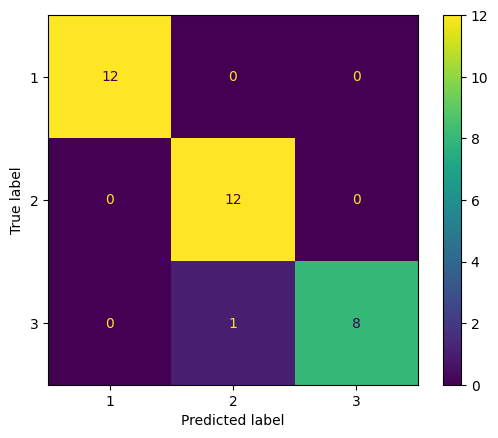

In [63]:
#Confusion matrix
lr_cm = confusion_matrix(y_test, lr_pred, labels = lr_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = lr_cm,
                              display_labels = lr_clf.classes_)
print("Logistic Regression Confusion Matrix")
disp.plot()
plt.show()

In [64]:
# Prediction rates by wine classes
calculatePredictionRates("Logistic Regression", lr_acc, lr_cm)


    The success rate of the Logistic Regression model on the test set: 97%
    Class 1 Wine correct prediction rate: 100%"
    Class 2 Wine correct prediction rate: 100%"
    Class 3 Wine correct prediction rate: 89%
    


In [65]:
# Train/Test Performance Metrics
lr_pm = pd.DataFrame(CalculatePerformance(lr_clf, X_train, y_train, X_test, y_test))*100
lr_pm

Model Performance Metrics Comparison


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,96.875,96.969697,95.555556,100.000000,100.000000,100.000000,97.727273,100.000000
1,96.875,96.969697,97.959184,100.000000,94.117647,92.307692,96.000000,96.000000
2,96.875,96.969697,97.058824,88.888889,97.058824,100.000000,97.058824,94.117647


In [66]:
# Updating comparison lists
updateLists("LogisticRegression", lr_clf, lr_pred, lr_acc, lr_cm, lr_f1, lr_pm, lr_prec, lr_recall, lr_acc_tr)

#### **4.4.KNN Model**

##### **4.4.1.Parameter Tuning**

In [67]:
# Creating model
clf = KNeighborsClassifier()
# Searching parameters
params = {"n_neighbors": np.arange(1, 25)}
# Creating grid
knn_clf_grid = RandomizedSearchCV(estimator = clf, 
                                  param_distributions = params,
                                  cv = StratifiedKFold(n_splits = 10, 
                                                       shuffle = True,
                                                       random_state = seed),
                                  verbose = 2, 
                                  scoring = "accuracy",
                                  n_jobs = -1)
# Fit the model
knn_model = knn_clf_grid.fit(X_train, y_train)

# Get best parameters
print("Best parameters for KNN model: ", knn_model.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best parameters for KNN model:  {'n_neighbors': 24}


##### **4.4.2.Building model with best parameters**

In [68]:
knn_clf = KNeighborsClassifier(n_neighbors = knn_model.best_params_.get('n_neighbors'))

# Fit the model
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

##### **4.4.3.Predictions and model accuracy**

In [69]:
knn_pred = knn_clf.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("KNN Model Accuracy:", knn_acc)
knn_acc_tr = knn_clf.score(X_train, y_train)
print("KNN Training Accuracy:", knn_acc_tr)

KNN Model Accuracy: 0.696969696969697
KNN Training Accuracy: 0.7421875


##### **4.4.4.Other test parameters**

In [70]:
# Classification Report
print("KNN Classification Report\n\n", classification_report(y_test, knn_pred))

KNN Classification Report

               precision    recall  f1-score   support

           1       0.85      0.92      0.88        12
           2       0.65      0.92      0.76        12
           3       0.33      0.11      0.17         9

    accuracy                           0.70        33
   macro avg       0.61      0.65      0.60        33
weighted avg       0.63      0.70      0.64        33



In [71]:
# For comparison list recordings
knn_recall = recall_score(y_test, knn_pred, average = None)
knn_prec = precision_score(y_test, knn_pred, average = None)
knn_f1 = f1_score(y_test, knn_pred, average = None)

KNN Confusion Matrix


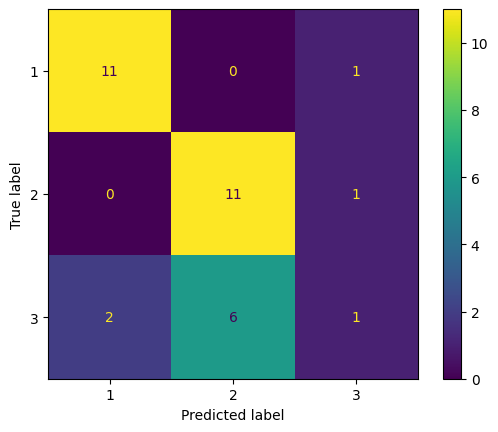

In [72]:
# Confusion matrix
knn_cm = confusion_matrix(y_test, knn_pred, labels = knn_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = knn_cm,
                              display_labels = knn_clf.classes_)
print("KNN Confusion Matrix")
disp.plot()
plt.show()

In [73]:
# Prediction rates by wine classes
calculatePredictionRates("KNN", knn_acc, knn_cm)


    The success rate of the KNN model on the test set: 70%
    Class 1 Wine correct prediction rate: 92%"
    Class 2 Wine correct prediction rate: 92%"
    Class 3 Wine correct prediction rate: 11%
    


In [74]:
# Train/Test Performance Metrics
knn_pm = pd.DataFrame(CalculatePerformance(knn_clf, X_train, y_train, X_test, y_test))*100
knn_pm

Model Performance Metrics Comparison


,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1
0,74.21875,69.69697,88.888889,91.666667,90.909091,84.615385,89.887640,88.000000
1,74.21875,69.69697,69.387755,91.666667,75.555556,64.705882,72.340426,75.862069
2,74.21875,69.69697,61.764706,11.111111,53.846154,33.333333,57.534247,16.666667


In [75]:
# Updating comparison lists
updateLists("KNN", knn_clf, knn_pred, knn_acc, knn_cm, knn_f1, knn_pm, knn_prec, knn_recall, knn_acc_tr)

# **5.Model Comparison**

#### **5.1.Comparison of all metrics and models**

In [76]:
def compare_metrics_barplot(comparison_list, model_list, metric_list, color_list):
    size = range(len(model_list))
    color_list = wine_cmap
    w = 0.15    
    
    # Selecting metrics one by one for all models
    def select_metrics(comparison_list, metric_list):
        row_list = []
        for metric in metric_list:
            row_out = list(comparison_list.loc[metric])
            row_list.append(row_out)
        return row_list
    
    y = select_metrics(comparison_list, metric_list)
    
    # Figure size
    plt.figure(figsize = (10, 5))
    # Positions, colors, labels and axes
    for i in range(len(metric_list)):
        plt.bar([pos + (i * w) for pos in size], 
                y[i], 
                width = w, 
                align = "center", 
                label = metric_list[i],
                color = color_list[i]) 
    # Display plot    
    plt.xlabel("Metrics")
    plt.ylabel("Rate")
    plt.title("All Metrics Comparison by Model's Built Order")
    plt.xticks([pos + (2.5 * w) for pos in size], model_list, rotation = 90)
    plt.yticks(np.arange(0, 105, 5))
    plt.legend(bbox_to_anchor = (1, 1), loc = "best")
    plt.show()

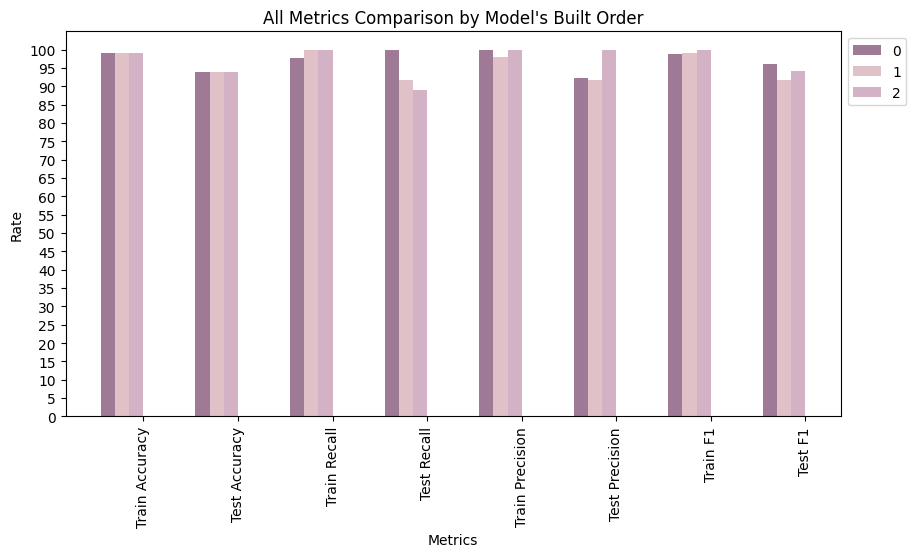

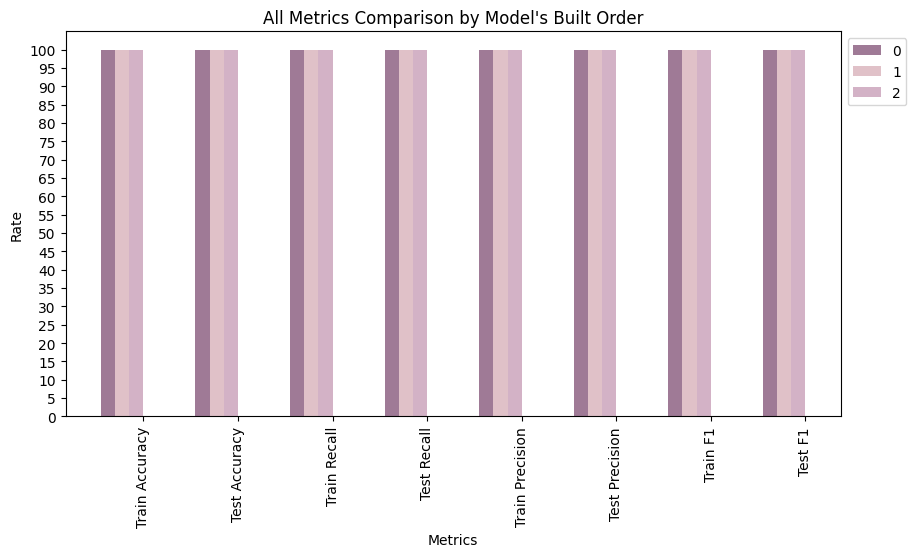

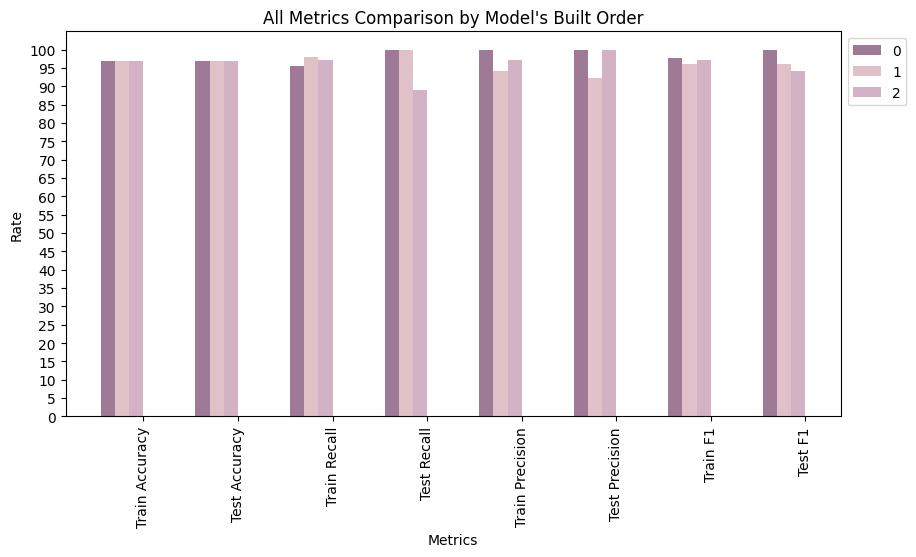

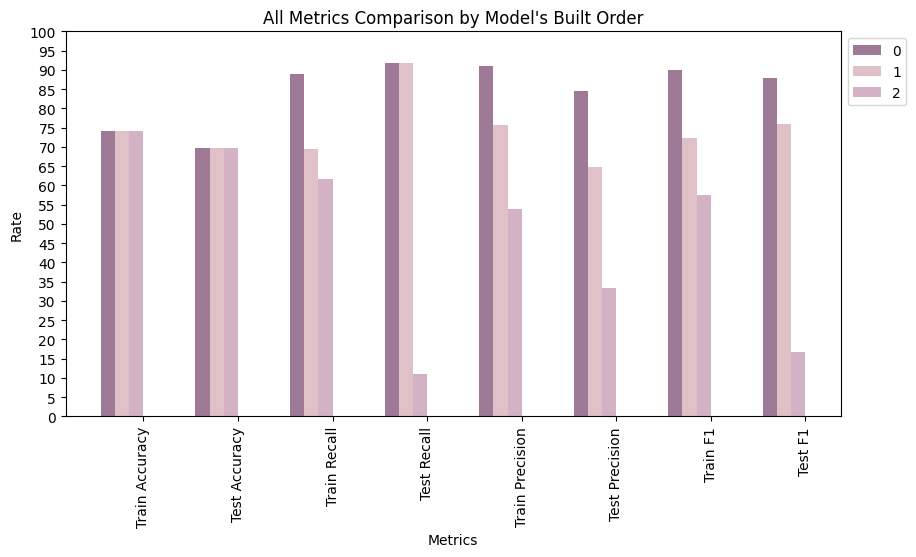

In [77]:
for p in performs:
    compare_metrics_barplot(p, p.columns.to_list(), p.index.to_list(), cmap)

#### **5.2.Comparison of models test & training accuracies**

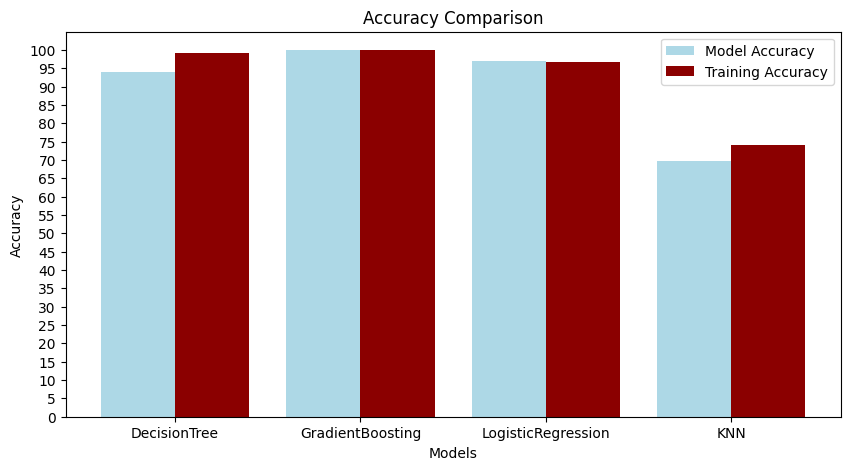

In [78]:
plt.figure(figsize = (10, 5))

plt.bar(np.arange(len(model_names)) - 0.2, 
        np.array(acc_list)*100, 0.4, label = "Model Accuracy", color = "lightblue") 
plt.bar(np.arange(len(model_names)) + 0.2, 
        np.array(tr_acc_list)*100, 0.4, label = "Training Accuracy", color = "darkred") 
plt.xticks(np.arange(len(model_names)), model_names)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparison")
plt.yticks(np.arange(0, 105, 5))
plt.legend(bbox_to_anchor = (1, 1), loc = "best")
plt.show()

#### **5.3.Comparison of confusion matrices**

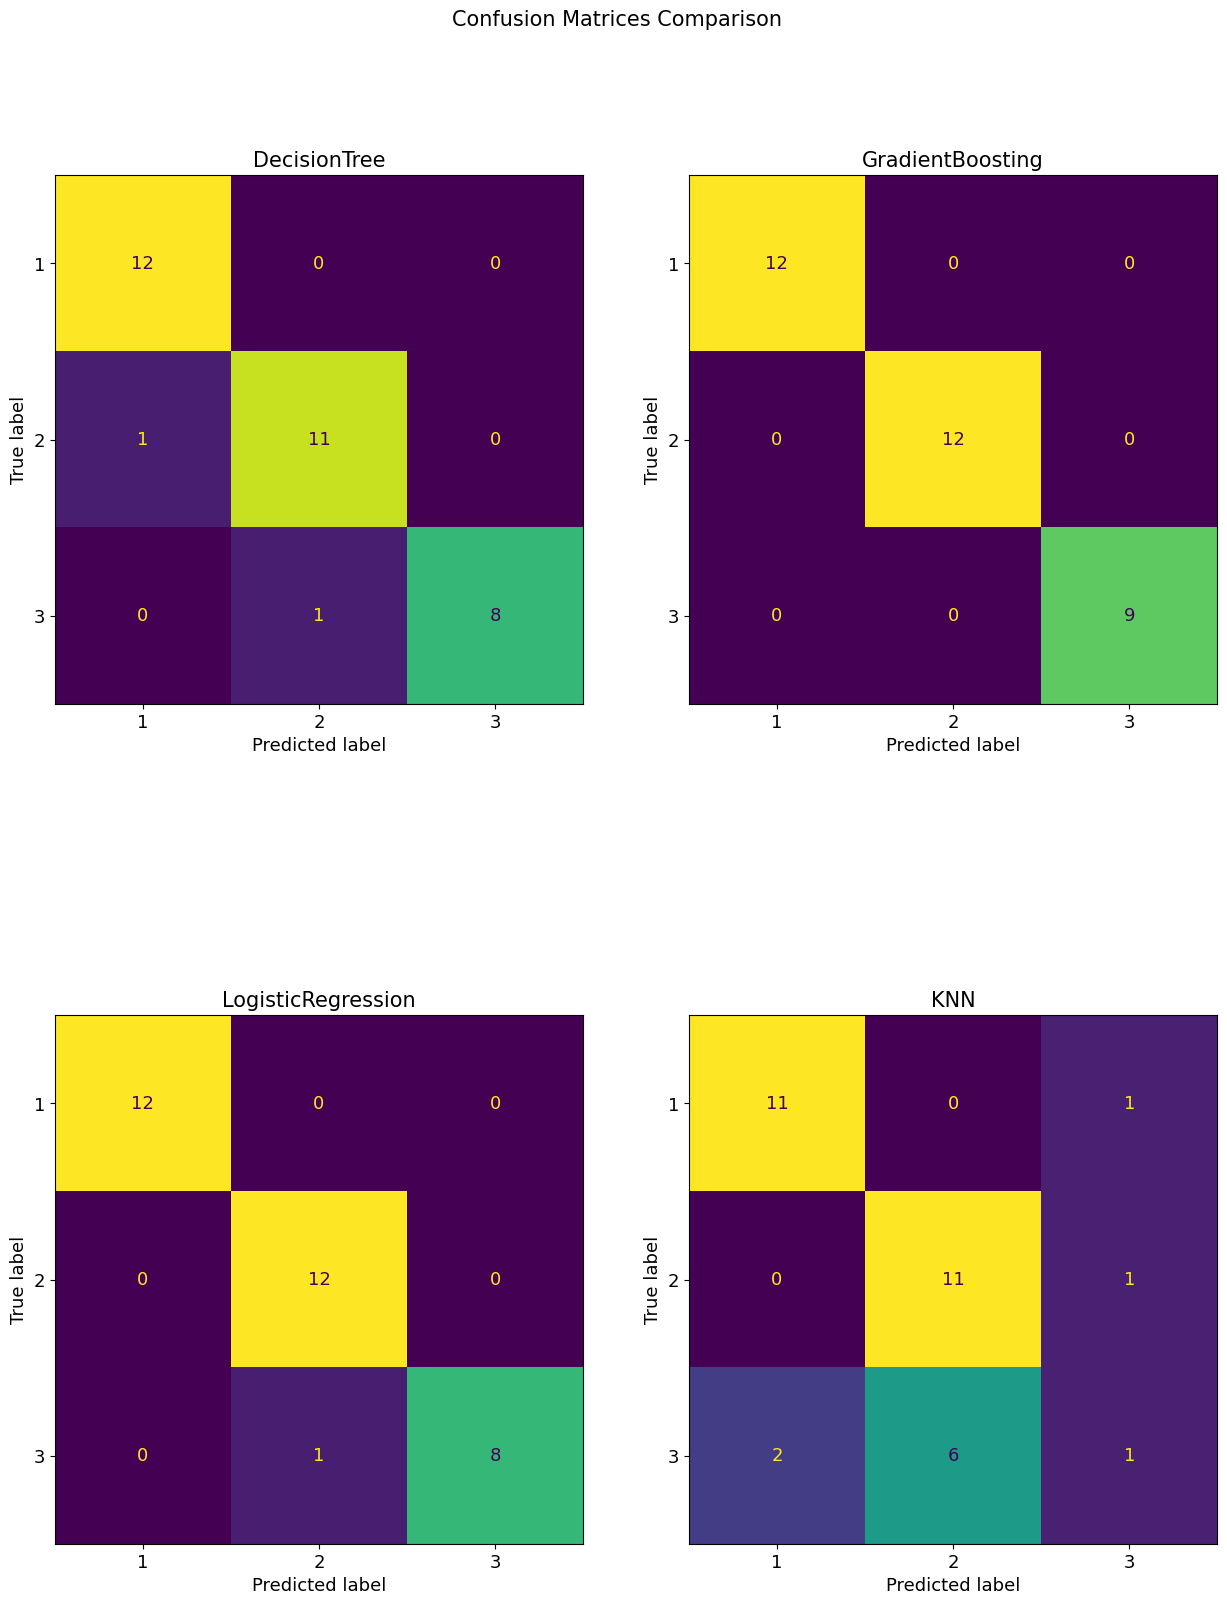

In [79]:
title_size = 15
plt.rcParams.update({"font.size": 13})
color_map = "viridis"
colorbar = False

# Subplots
f, axes = plt.subplots(2, 2, figsize = (15, 20))

for i, j in np.ndindex(axes.shape):

        axes[i, j].set_title(model_names[2*i + j], size = title_size)
        disp = ConfusionMatrixDisplay(confusion_matrix = cm_list[2*i + j], 
                                      display_labels = clf_list[2*i + j].classes_)
        disp.plot(include_values = True, cmap = color_map, ax = axes[i, j], colorbar = colorbar)
    
f.suptitle("Confusion Matrices Comparison", size = title_size, y=0.92)
plt.show()

# **6.Summary and Conclusion**

The Gradient Boosting model has the best accuracy score on the test set. Logistic Regression and Decision Tree follow in order. The KNN model has the worst accuracy.

As can be seen from the confusion matrices, the Gradient Boosting model predicted all wine classes correctly.